In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [15]:
########################################################################################
########################################################################################
#Functions 

def Split_By_Ages(data):
    three = data[0:1102]
    eighteen = data[1102:2623]
    twentyfour = data[2623:3855]
    return three, eighteen, twentyfour

def remove_nan(A,B,C):
    new_A = np.array([])
    new_B = np.array([])
    new_C = np.array([])
    for i in range(0,np.size(A)):
        if not np.isnan(A[i]) and not np.isnan(B[i]) and not np.isnan(C[i]):
            new_A = np.append(new_A, A[i])
            new_B = np.append(new_B, B[i])
            new_C = np.append(new_C, C[i])
    return new_A, new_B, new_C

def remove_nan2(A,B):
    new_A = np.array([])
    new_B = np.array([])
    new_C = np.array([])
    for i in range(0,np.size(A)):
        if not np.isnan(A[i]) and not np.isnan(B[i]):
            new_A = np.append(new_A, A[i])
            new_B = np.append(new_B, B[i])
    return new_A, new_B

#For some reason python is returning complex values with imaginary part = 0
def remove_complex(A):
    new_A = np.array([])
    for i in range(0, np.size(A)):
        new_A = np.append(new_A, np.real(A[i]))
    return new_A



def Norm_Mutual_Info_Chan_Cap_Four_State(TF, TG):
    size = np.size(TF)
    a_count = 0
    b_count = 0
    c_count = 0
    for i in range(0,size):
        if TF[i] == 0 and TG[i] == 0:
            a_count += 1
        elif TF[i] != 0 and TG[i] == 0:
            b_count += 1
        elif TF[i] == 0 and TG[i] != 0:
            c_count += 1
    
    a = a_count/size
    b = b_count/size
    c = c_count/size
    d = 1 - a - b - c

    alpha = a + c
    beta = b/(1 - alpha)
    gamma = c/alpha
    x = alpha*(1 - beta - gamma) + beta

    B = (((beta**beta)*((1-beta)**(1-beta)))/((gamma**gamma)*((1-gamma)**(1-gamma))))**(1/(1 - beta - gamma))
    x_s = 1/(1+B)
    alpha_s = (x_s - beta)/(1 - beta - gamma)


    #I1: -(1 - gamma)*alpha*np.log(x/(1 - gamma))
    if (1 - gamma)*alpha == 0:
        I1 = 0
    elif x == 0: 
        I1 = np.NaN
    else:
        I1 = -(1 - gamma)*alpha*np.log(x/(1 - gamma))

    #I2: -beta*(1 - alpha)*np.log(x/beta)
    if beta*(1 - alpha) == 0:
        I2 = 0
    elif x == 0:
        I2 == np.NaN
    else: 
        I2 = -beta*(1 - alpha)*np.log(x/beta)
    
    #I3: -gamma*alpha*np.log((1 - x)/gamma)
    if gamma*alpha == 0:
        I3 = 0
    elif 1 - x == 0:
        I3 = np.NaN
    else:
        I3 = -gamma*alpha*np.log((1 - x)/gamma)

    #I4: -(1 - beta)*(1 - alpha)*np.log((1 - x)/(1 - beta))
    if (1 - beta)*(1 - alpha) == 0:
        I4 = 0
    elif (1 - x) == 0:
        I4 = np.NaN
    else:
        I4 = -(1 - beta)*(1 - alpha)*np.log((1 - x)/(1 - beta))

    I = I1 + I2 + I3 + I4

    #C1: -(1 - gamma)*alpha_s*np.log(x_s/(1 - gamma))
    if (1 - gamma)*alpha_s == 0:
        C1 = 0
    elif x_s == 0: 
        C1 = np.NaN
    else:
        C1 = -(1 - gamma)*alpha_s*np.log(x_s/(1 - gamma))

    #C2: -beta*(1 - alpha_s)*np.log(x_s/beta)
    if beta*(1 - alpha_s) == 0:
        C2 = 0
    elif x_s == 0:
        C2 == np.NaN
    else: 
        C2 = -beta*(1 - alpha_s)*np.log(x_s/beta)

    #C3: -gamma*alpha_s*np.log((1 - x_s)/gamma)
    if gamma*alpha_s == 0:
        C3 = 0
    elif 1 - x_s == 0:
        C3 = np.NaN
    else:
        C3 = -gamma*alpha_s*np.log((1 - x_s)/gamma)

    #C4: -(1 - beta)*(1 - alpha_s)*np.log((1 - x_s)/(1 - beta))
    if (1 - beta)*(1 - alpha_s) == 0:
        C4 = 0
    elif (1 - x_s) == 0:
        C4 = np.NaN
    else:
        C4 = -(1 - beta)*(1 - alpha_s)*np.log((1 - x_s)/(1 - beta))

    C = C1 + C2 + C3 + C4

    #mean entropy from given p(x) and p(y)
    #H(x) = -(alpha)*np.log(alpha) - (1 - alpha)*np.log(1 - alpha)
    if alpha == 0:
        H_x1 = 0
    else:
        H_x1 = -alpha*np.log(alpha)
    if (1 - alpha) == 0:
        H_x2 = 0
    else:
        H_x2 = -(1-alpha)*np.log(1-alpha)
    
    H_x = H_x1 + H_x2

    #H(y) = -x*np.log(x) - (1 - x)*np.log(1 - x)
    if x == 0:
        H_y1 = 0
    else:
        H_y1 = -x*np.log(x)
    if (1 - x) == 0:
        H_y2 = 0
    else:
        H_y2 = -(1-x)*np.log(1-x)

    H_y = H_y1 + H_y2

    mean_H = .5*(H_x + H_y)

    #mean entropy from optimum p(x) and p(y)
    #H_op(x) = -(alpha_s)*np.log(alpha_s) - (1 - alpha_s)*np.log(1 - alpha_s)
    if alpha_s == 0:
        Hop_x1 = 0
    else:
        Hop_x1 = -alpha_s*np.log(alpha_s)
    if (1 - alpha_s) == 0:
        Hop_x2 = 0
    else:
        Hop_x2 = -(1-alpha_s)*np.log(1-alpha_s)
    
    Hop_x = Hop_x1 + Hop_x2

    #H_op(y) = -x_s*np.log(x_s) - (1 - x_s)*np.log(1 - x_s)
    if x_s == 0:
        Hop_y1 = 0
    else:
        Hop_y1 = -x_s*np.log(x_s)
    if (1 - x_s) == 0:
        Hop_y2 = 0
    else:
        Hop_y2 = -(1-x_s)*np.log(1-x_s)

    Hop_y = Hop_y1 + Hop_y2

    mean_Hop = .5*(Hop_x + Hop_y)

    NI = I/mean_H

    NC = C/mean_H

    NopC = C/mean_Hop

    return NI, NC, NopC, I, C


In [16]:


###################################################################################################
#Empty arrays to append data
NI3s = np.array([])
NI18s = np.array([])
NI24s = np.array([])

NC3s = np.array([])
NC18s = np.array([])
NC24s = np.array([])

NopC3s = np.array([])
NopC18s = np.array([])
NopC24s = np.array([])

I3s = np.array([])
I18s = np.array([])
I24s = np.array([])

C3s = np.array([])
C18s = np.array([])
C24s = np.array([])


In [17]:

####################################################################################################
#Imported data
#PC
data = pd.read_csv('D:/OneDrive - University of Pittsburgh/PhD proposal/Noisy channel research/channel_capacity/clean_ordered_facscountmatrix8dec.csv')
pairs = pd.read_csv('D:/OneDrive - University of Pittsburgh/PhD proposal/Noisy channel research/channel_capacity/alltftgpairs.csv')

# #Laptop
# data = pd.read_csv('C:/Users/sruth/OneDrive - University of Pittsburgh/PhD proposal/Noisy channel research/channel_capacity/clean_ordered_facscountmatrix8dec.csv')
# pairs = pd.read_csv('C:/Users/sruth/OneDrive - University of Pittsburgh/PhD proposal/Noisy channel research/channel_capacity/alltftgpairs.csv')


num_of_pairs = pairs.shape[0]

#indices to avoid
Genes = data.columns

index_of_TF_not_found = np.array([])
index_of_TG_not_found = np.array([])

for i in range(0,num_of_pairs):
    if not pairs['TF'][i] in Genes:
        index_of_TF_not_found = np.append(index_of_TF_not_found, i)
    if not pairs['TG'][i] in Genes:
        index_of_TG_not_found = np.append(index_of_TG_not_found, i)

indices_to_avoid = index_of_TF_not_found
for i in range(0,np.size(index_of_TG_not_found)):
    if not index_of_TG_not_found[i] in indices_to_avoid:
        indices_to_avoid = np.append(indices_to_avoid, index_of_TG_not_found[i])

#Looping over data and appending to arrays
for i in range(0,num_of_pairs):
    if not i in indices_to_avoid:

        TF = np.array(data[pairs['TF'][i]])
        TG = np.array(data[pairs['TG'][i]])

        #Splitting up age groups
        TF3, TF18, TF24 = Split_By_Ages(TF)
        TG3, TG18, TG24 = Split_By_Ages(TG)

        NI3s = np.append(NI3s, Norm_Mutual_Info_Chan_Cap_Four_State(TF3, TG3)[0])
        NC3s = np.append(NC3s, Norm_Mutual_Info_Chan_Cap_Four_State(TF3, TG3)[1])
        NopC3s = np.append(NopC3s, Norm_Mutual_Info_Chan_Cap_Four_State(TF3, TG3)[2])
        I3s = np.append(I3s, Norm_Mutual_Info_Chan_Cap_Four_State(TF3, TG3)[3])
        C3s = np.append(C3s, Norm_Mutual_Info_Chan_Cap_Four_State(TF3, TG3)[4])

        NI18s = np.append(NI18s, Norm_Mutual_Info_Chan_Cap_Four_State(TF18, TG18)[0])
        NC18s = np.append(NC18s, Norm_Mutual_Info_Chan_Cap_Four_State(TF18, TG18)[1])
        NopC18s = np.append(NopC18s, Norm_Mutual_Info_Chan_Cap_Four_State(TF18, TG18)[2])
        I18s = np.append(I18s, Norm_Mutual_Info_Chan_Cap_Four_State(TF18, TG18)[3])
        C18s = np.append(C18s, Norm_Mutual_Info_Chan_Cap_Four_State(TF18, TG18)[4])

        NI24s = np.append(NI24s, Norm_Mutual_Info_Chan_Cap_Four_State(TF24, TG24)[0])
        NC24s = np.append(NC24s, Norm_Mutual_Info_Chan_Cap_Four_State(TF24, TG24)[1])
        NopC24s = np.append(NopC24s, Norm_Mutual_Info_Chan_Cap_Four_State(TF24, TG24)[2])
        I24s = np.append(I24s, Norm_Mutual_Info_Chan_Cap_Four_State(TF24, TG24)[3])
        C24s = np.append(C24s, Norm_Mutual_Info_Chan_Cap_Four_State(TF24, TG24)[4])


NI3s, NC3s, NopC3s = remove_nan(NI3s, NC3s, NopC3s)
NI18s, NC18s, NopC18s = remove_nan(NI18s, NC18s, NopC18s)
NI24s, NC24s, NopC24s = remove_nan(NI24s, NC24s, NopC24s)
I3s, C3s = remove_nan2(I3s, C3s)
I18s, C18s = remove_nan2(I18s, C18s)
I24s, C24s = remove_nan2(I24s, C24s)

NI3s = remove_complex(NI3s)
NI18s = remove_complex(NI18s)
NI24s = remove_complex(NI24s)
NC3s = remove_complex(NC3s)
NC18s = remove_complex(NC18s)
NC24s = remove_complex(NC24s)
NopC3s = remove_complex(NopC3s)
NopC18s = remove_complex(NopC18s)
NopC24s = remove_complex(NopC24s)
I3s = remove_complex(I3s)
I18s = remove_complex(I18s)
I24s = remove_complex(I24s)
C3s = remove_complex(C3s)
C18s = remove_complex(C18s)
C24s = remove_complex(C24s)


NI3s_ave = np.average(NI3s)
NC3s_ave = np.average(NC3s)
NopC3s_ave = np.average(NopC3s)
NI18s_ave = np.average(NI18s)
NC18s_ave = np.average(NC18s)
NopC18s_ave = np.average(NopC18s)
NI24s_ave = np.average(NI24s)
NC24s_ave = np.average(NC24s)
NopC24s_ave = np.average(NopC24s)
I3s_ave = np.average(I3s)
C3s_ave = np.average(C3s)
I18s_ave = np.average(I18s)
C18s_ave = np.average(C18s)
I24s_ave = np.average(I24s)
C24s_ave = np.average(C24s)

NI3s_std = np.std(NI3s)
NC3s_std = np.std(NC3s)
NopC3s_std = np.std(NopC3s)
NI18s_std = np.std(NI18s)
NC18s_std = np.std(NC18s)
NopC18s_std = np.std(NopC18s)
NI24s_std = np.std(NI24s)
NC24s_std = np.std(NC24s)
NopC24s_std = np.std(NopC24s)
I3s_std = np.std(I3s)
C3s_std = np.std(C3s)
I18s_std = np.std(I18s)
C18s_std = np.std(C18s)
I24s_std = np.std(I24s)
C24s_std = np.std(C24s)

NI3s_stderr = np.std(NI3s)/(np.sqrt(np.size(NI3s)))
NC3s_stderr = np.std(NC3s)/(np.sqrt(np.size(NC3s)))
NopC3s_stderr = np.std(NopC3s)/(np.sqrt(np.size(NopC3s)))
NI18s_stderr = np.std(NI18s)/(np.sqrt(np.size(NI18s)))
NC18s_stderr = np.std(NC18s)/(np.sqrt(np.size(NC18s)))
NopC18s_stderr = np.std(NopC18s)/(np.sqrt(np.size(NopC18s)))
NI24s_stderr = np.std(NI24s)/(np.sqrt(np.size(NI24s)))
NC24s_stderr = np.std(NC24s)/(np.sqrt(np.size(NC24s)))
NopC24s_stderr = np.std(NopC24s)/(np.sqrt(np.size(NopC24s)))
I3s_stderr = np.std(I3s)/(np.sqrt(np.size(I3s)))
C3s_stderr = np.std(C3s)/(np.sqrt(np.size(C3s)))
I18s_stderr = np.std(I18s)/(np.sqrt(np.size(I18s)))
C18s_stderr = np.std(C18s)/(np.sqrt(np.size(C18s)))
I24s_stderr = np.std(I24s)/(np.sqrt(np.size(I24s)))
C24s_stderr = np.std(C24s)/(np.sqrt(np.size(C24s)))


NIs_ave = np.array([NI3s_ave, NI18s_ave, NI24s_ave])
NIs_std = np.array([NI3s_std, NI18s_std, NI24s_std])
NIs_stderr = np.array([NI3s_stderr, NI18s_stderr, NI24s_stderr])

NCs_ave = np.array([NC3s_ave, NC18s_ave, NC24s_ave])
NCs_std = np.array([NC3s_std, NC18s_std, NC24s_std])
NCs_stderr = np.array([NC3s_stderr, NC18s_stderr, NC24s_stderr])

NopCs_ave = np.array([NopC3s_ave, NopC18s_ave, NopC24s_ave])
NopCs_std = np.array([NopC3s_std, NopC18s_std, NopC24s_std])
NopCs_stderr = np.array([NopC3s_stderr, NopC18s_stderr, NopC24s_stderr])

Is_ave = np.array([I3s_ave, I18s_ave, I24s_ave])
Is_std = np.array([I3s_std, I18s_std, I24s_std])
Is_stderr = np.array([I3s_stderr, I18s_stderr, I24s_stderr])

Cs_ave = np.array([C3s_ave, C18s_ave, C24s_ave])
Cs_std = np.array([C3s_std, C18s_std, C24s_std])
Cs_stderr = np.array([C3s_stderr, C18s_stderr, C24s_stderr])


print(NI3s_ave, NI18s_ave, NI24s_ave)
print(NI3s_std, NI18s_std, NI24s_std)
print(NI3s_stderr, NI18s_stderr, NI24s_stderr)
print(" ")
print(NC3s_ave, NC18s_ave, NC24s_ave)
print(NC3s_std, NC18s_std, NC24s_std)
print(NC3s_stderr, NC18s_stderr, NC24s_stderr)
print(" ")
print(NopC3s_ave, NopC18s_ave, NopC24s_ave)
print(NopC3s_std, NopC18s_std, NopC24s_std)
print(NopC3s_stderr, NopC18s_stderr, NopC24s_stderr)


age = np.array([3,18,24])


np.savez("4State_All_Results", NIs_ave=NIs_ave, NIs_stderr=NIs_stderr, NopCs_ave=NopCs_ave, NopCs_stderr=NopCs_stderr, Is_ave=Is_ave, Is_stderr=Is_stderr, Cs_ave=Cs_ave, Cs_stderr=Cs_stderr)


C:\Users\SRS204\AppData\Local\Temp/ipykernel_1624/4244359101.py:99: RuntimeWarning: invalid value encountered in log
  I4 = -(1 - beta)*(1 - alpha)*np.log((1 - x)/(1 - beta))


0.0138865674286834 0.014624819464598218 0.010598072511579097
0.07696346383842931 0.07532259563327046 0.07633022421531199
0.0040847965336296395 0.004003350790357832 0.00411544987818867
 
0.02730708219976305 0.026851520193558465 0.035019226725922725
0.11933753251167656 0.10215619594967537 0.1457270935052023
0.00633377858562816 0.005429540556279492 0.00785707831177137
 
0.018017697270333963 0.01928460178109138 0.016231719193756364
0.07909259806515619 0.07582747558822907 0.07768905771455038
0.004197799245243868 0.004030184857210232 0.004188713270460974


Text(0, 0.5, 'Nats')

<Figure size 432x288 with 0 Axes>

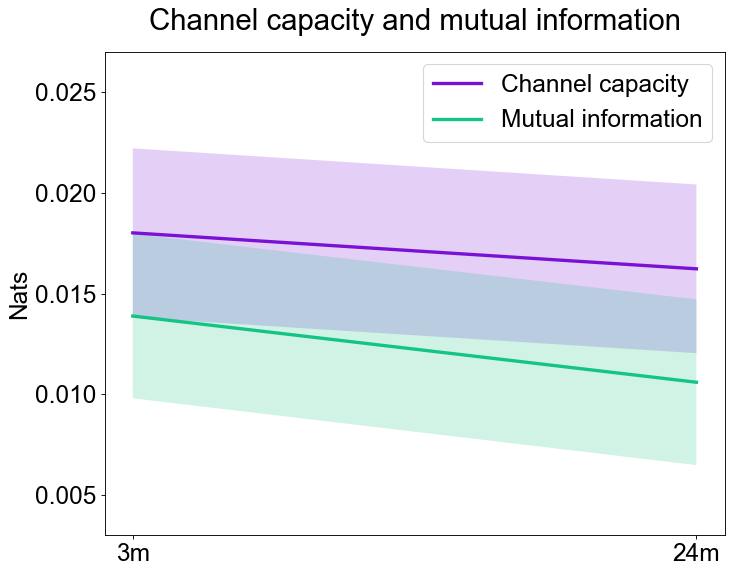

In [18]:
age = np.array([3,24])
NopCs_ave = np.array([NopC3s_ave,  NopC24s_ave])
NopCs_std = np.array([NopC3s_std,  NopC24s_std])
NopCs_stderr = np.array([NopC3s_stderr,  NopC24s_stderr])

NIs_ave = np.array([NI3s_ave,  NI24s_ave])
NIs_std = np.array([NI3s_std,  NI24s_std])
NIs_stderr = np.array([NI3s_stderr,  NI24s_stderr])

from matplotlib.pyplot import figure

plt.figure(1)
figure(figsize=(10, 8), dpi=80)
#plt.figure(figsize=(14, 8))
plt.rcParams.update({'font.size': 22,'font.family':'sans-serif', 'font.sans-serif':"Arial"})

plt.plot(age, NopCs_ave, c = '#7A12D6', lw=3, label = "Channel capacity")
#plt.errorbar(age, NopCs_ave, yerr = NopCs_stderr, fmt = 'o', c = 'red')
plt.fill_between(age, NopCs_ave - NopCs_stderr, NopCs_ave + NopCs_stderr, facecolor = '#7A12D6',alpha=0.2)
plt.plot(age, NIs_ave, c = '#14c486', lw=3, label = "Mutual information")
#plt.errorbar(age, NIs_ave, yerr = NIs_stderr, fmt = 'o', c = 'b')
plt.fill_between(age, NIs_ave - NIs_stderr, NIs_ave + NIs_stderr, facecolor = '#14c486', alpha=0.2)
#plt.plot(age, NCs_ave, c = 'red', label = "Average NCC")
#plt.errorbar(age, NCs_ave, yerr = NCs_stderr, fmt = 'o', c = 'red')


tick_locs = [3, 24]
tick_lbls = ['3m', '24m']
plt.xticks(tick_locs, tick_lbls)

plt.ylim([0.003, 0.027])
#plt.tick_params(which='both',top=True,right=True)
plt.legend(loc='upper right')


plt.title("Channel capacity and mutual information", pad=20)
plt.ylabel("Nats")
#plt.savefig("Preserved MI: Information trasmission efficiency")
#plt.show()


In [19]:
print(len(list(NopC3s)))

print(len(list(NopC24s)))

355
344


In [20]:
data=pd.DataFrame.from_dict({'Value':list(NopC3s)+list(NopC24s)+list(NI3s)+list(NI24s),'Category':['Channel capacity']*355+['Channel capacity']*344+['Mutual information']*355+['Mutual information']*344, 'Age': ['3m']*355+['24m']*344+['3m']*355+['24m']*344})

print(data)


         Value            Category  Age
0     0.004961    Channel capacity   3m
1     0.001338    Channel capacity   3m
2     0.004604    Channel capacity   3m
3     0.003902    Channel capacity   3m
4     0.008837    Channel capacity   3m
...        ...                 ...  ...
1393  0.004424  Mutual information  24m
1394  0.000528  Mutual information  24m
1395  0.011209  Mutual information  24m
1396  0.000099  Mutual information  24m
1397  0.000609  Mutual information  24m

[1398 rows x 3 columns]


<Figure size 800x640 with 0 Axes>

[Text(0.5, 0, ''), Text(0, 0.5, 'Nats')]

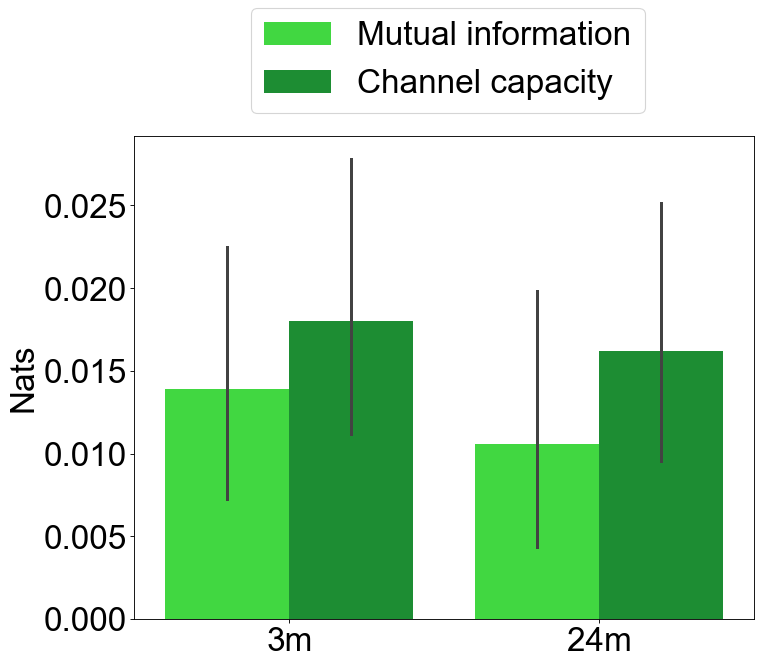

In [22]:
import seaborn as sns
figure(figsize=(10, 8), dpi=80)
#plt.figure(figsize=(14, 8))
plt.rcParams.update({'font.size': 30,'font.family':'sans-serif', 'font.sans-serif':"Arial"})

# Create an array with the colors you want to use
colors = [ "#28F028","#0AA028"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

ax = sns.barplot(x="Age", y="Value", hue="Category", hue_order=['Mutual information','Channel capacity'], data=data) #, ci='sd'

ax.legend(loc='upper right', bbox_to_anchor=(0.85, 1.3))
ax.set(xlabel='', ylabel='Nats')
